# ML Final Project Outline 

## Table of Contents

* Visualization on Dataset 
* Linear Regression
* Polynomial Regression 
* Regularization 
    * Grid search
* Classication 
    * Logistic 
    * KNN  
    * Support Vector 
* Decision Tree 
    * Classification Tree
    * Regression Tree
    * BAGG 
    * Random Forest 
    * Boosting

The data was taken from the Kaggle competition with the wine quality dataset

The dataset consists of parameters that determines the win'e different aspect as well as the numerical evaluation of the wine quality

## Data Description taken from Kaggle:
### Input variables (based on physicochemical tests):
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    Output variable (based on sensory data):
    12 - quality (score between 0 and 10)

 ## General Note about the Data
    1- File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:
        $quality$ > 6.5 => "good"
        TRUE => "bad


# Research Goal:
We transformed the column for wine quality into binary and thus create both binary y and also numerical y for the different models.


We designated two sets of Y in this case

1. The first one is numerical where it measures the wine quality from a scale from 2 to 8


2. The second one is a binary where it measures the wine quality in simple 0 and 1 where 1 is designated for good wine quality (>6.5)

We are targeted to conduct research to investigate classification vs regression

We are looking to examine which method provide the best result. 


# Package Preperation and Install

In [19]:
#Importing required packages. hello
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.linear_model import LinearRegression
# Importing Classification / Model Selection Tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Preprocess

In [6]:
binned_quality = pd.cut(df['quality'],
bins = [0, 6.5, 8],
labels=['bad', 'good'])
dict_binned_quality = {'wine': binned_quality}
df['wine'] = pd.DataFrame(dict_binned_quality)
df.groupby('wine').quality.sum()
#I changed the name from 'bin_q' to 'wine' so the column name is more clear 

wine
bad     7475
good    1537
Name: quality, dtype: int64

(array([0, 1]), [Text(0, 0, 'bad'), Text(1, 0, 'good')])

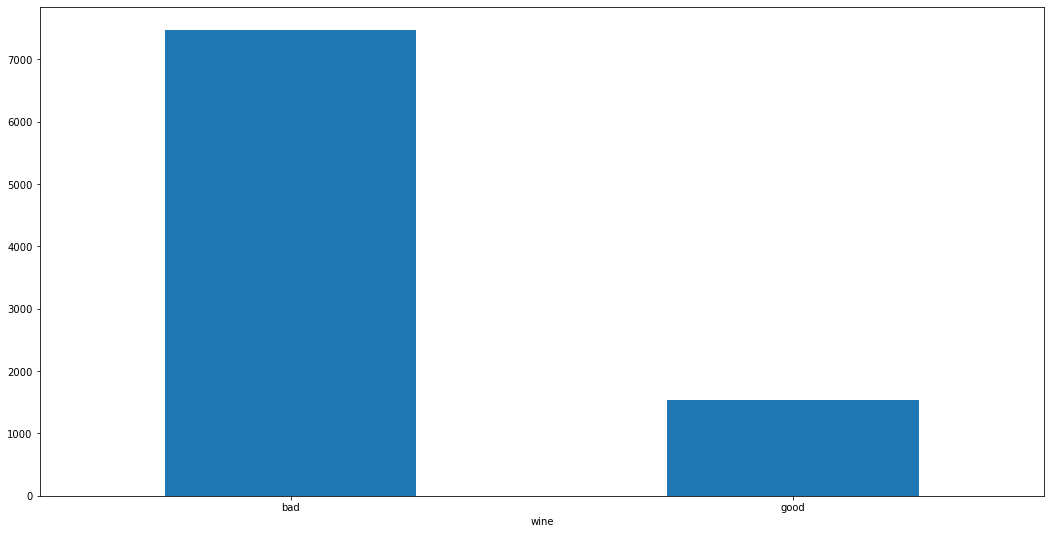

In [7]:
df.groupby('wine').quality.sum().plot(kind = 'bar', figsize = (18, 9))
plt.xticks(rotation=0)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [9]:
df = pd.get_dummies(df, columns=['wine'], drop_first = True)


In [10]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [13]:
X = df.drop('quality', axis = 1)
X =X.drop('wine_good', axis = 1)

# df['quality'] is numerical df['wine_good'] is binary
#y = df['quality']
y = df['wine_good']

In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: wine_good, dtype: uint8

In [16]:
from sklearn.preprocessing import StandardScaler
testSize = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [20]:
nmc = 500
line=LinearRegression()
shuffle = ShuffleSplit(n_splits=nmc, test_size=.5)
CVInfo = cross_validate(line, X, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.24657634122966113
0.22168857993237603


In [21]:
line.fit(X_train, y_train)
y_pred_linear = line.predict(X_test)
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
Linear

,Actual,Predicted
803,0,0.004529
124,0,-0.045829
350,0,0.104899
682,0,0.010764
1326,0,0.157460
...,...,...
1565,0,0.191653
327,0,0.396788
254,0,0.017353
322,0,-0.008291


## Ridge

In [22]:
# Run Ridge on original data
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

nmc = 500
shuffle = ShuffleSplit(n_splits=nmc, test_size=.5)
ridge = Ridge(alpha=5.0)
CVInfo = cross_validate(ridge, X, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.23401826887366298
0.21444063434188415


In [23]:
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
Ridge=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
Ridge

,Actual,Predicted
803,0,0.005183
124,0,-0.046369
350,0,0.104570
682,0,0.011979
1326,0,0.157720
...,...,...
1565,0,0.191137
327,0,0.395413
254,0,0.017866
322,0,-0.007814


## SGD Classification

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
sgdc = SGDClassifier(loss="log",penalty="l2",max_iter=500, tol=1e-3)
sgdc.fit(X_train, y_train)
score = sgdc.score(X_train, y_train)
print("Score: ", score)
print("Test Score:")
print(sgdc.score(X_test,y_test))

y_pred = sgdc.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Score:  0.874120406567631
Test Score:
0.84375
Accuracy: 0.84


In [30]:
penalty = ['l1', 'l2'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
solver = ['liblinear', 'saga'] 
param_grid = dict(penalty=penalty, 
C=C, 
class_weight=class_weight, 
solver=solver) 
logistic = LogisticRegression() 
grid = GridSearchCV(estimator=logistic, 
param_grid=param_grid, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 
grid_result = grid.fit(X_train, y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Score:  0.8688113719255588
Best Params:  {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}


In [35]:
# This is best model for SDG
from sklearn.model_selection import GridSearchCV
best_model2 = grid_result.best_estimator_

# Rerun cross validation for this model just to check
CVInfo = cross_validate(best_model2, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)

print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

y_pred = best_model2.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
y_pred

0.8641777221526908
0.8644025000000001
Accuracy: 0.86


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## Classification

### Part 1: Logistic Regression

Note: Stardardization is not needed when dealing with non-regularized regresssions

In [37]:
# Setup nmc and Logistic Regression
Xs=X.copy()
nmc = 250
lr = LogisticRegression(penalty = "none", solver = "lbfgs", max_iter = 1000)

# Running 250 Monte Carlo cross-validation
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(lr, Xs, y, cv=shuffle,return_train_score=True,n_jobs=-1)
print("Train Score for Logistic Regression: ", np.mean(CVInfo['test_score']))
print("Test Score for Logistic Regression: ", np.mean(CVInfo['train_score']))

Train Score for Logistic Regression:  0.87961
Test Score for Logistic Regression:  0.8826989157631361


In [38]:
# Classification Report and Scores
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.57      0.28      0.37        47

    accuracy                           0.86       320
   macro avg       0.73      0.62      0.65       320
weighted avg       0.84      0.86      0.84       320



In [39]:
# Classification Report and Scores
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(classification_report(y_test, pred_lr))
# Classification Report and Scores
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(classification_report(y_test, pred_lr))
# part 2: K-Nearest Neighbor Regression
# Note: Standardization is needed for KNN

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.57      0.28      0.37        47

    accuracy                           0.86       320
   macro avg       0.73      0.62      0.65       320
weighted avg       0.84      0.86      0.84       320

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.57      0.28      0.37        47

    accuracy                           0.86       320
   macro avg       0.73      0.62      0.65       320
weighted avg       0.84      0.86      0.84       320



### Part 2: K-Nearest Neighbor Regression
Note: Standardization is needed for KNN

In [40]:
# Create a pipeline model with Monte Carlo set to 250

fullModel = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid={'knn__n_neighbors':[5, 10, 25, 50, 100, 250]}
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=250)
grid_search = GridSearchCV(fullModel,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(Xs,y)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_knn__n_neighbors']])
print("-------------------------------------------------------------------------------------")
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

   rank_test_score  mean_test_score param_knn__n_neighbors
0                4          0.87180                      5
1                2          0.87662                     10
2                1          0.87858                     25
3                3          0.87566                     50
4                5          0.87077                    100
5                6          0.86454                    250
-------------------------------------------------------------------------------------
best param: {'knn__n_neighbors': 25}
best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=25))])
best test score: 0.8785799999999999


In [43]:
# Save the best parameters from grid search as the best model
best_knnmodel = grid_search.best_estimator_

# Re-run the best model using cross validation
nmc = 250
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(best_knnmodel, Xs, y, cv=shuffle,return_train_score=True,n_jobs=-1)
print("Best Model: ")
print("train score: ",np.mean(CVInfo['train_score']))
print("test score: ",np.mean(CVInfo['test_score']))

Best Model: 
train score:  0.8847005838198498
test score:  0.87712


In [44]:
#Classification Report and Scores
best_knnmodel.fit(X_train, y_train)
pred_knn = best_knnmodel.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       273
           1       0.46      0.23      0.31        47

    accuracy                           0.85       320
   macro avg       0.67      0.59      0.61       320
weighted avg       0.82      0.85      0.83       320



### Part 3: Support Vector Machines

In [45]:
# Basic Support Vector Machines with default hyperparameters
lsv = SVC()
lsv.fit(X_train, y_train)
pred_lsv = lsv.predict(X_test)

# Classification Reprot for Basic LSV with default hyperparameters
print(classification_report(y_test, pred_lsv))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [67]:
# Incorprating Monte Carlo CV and grid search for 3 hyperparameters: C, kernel, gamma
param_grid={'C': np.arange(0.5,1,0.1),
            'kernel': ['linear', 'rbf'],
            'gamma': np.arange(0.3,0.7,0.1)}

shuffle_split = ShuffleSplit(test_size=0.25, n_splits=10)
grid_search = GridSearchCV(SVC(),param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)

grid_search.fit(Xs,y)

results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by = 'rank_test_score').head(5)
print(results[['rank_test_score','mean_test_score','param_C','param_kernel','param_gamma']])
print("-------------------------------------------------------------------------------------")
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

    rank_test_score  mean_test_score param_C param_kernel param_gamma
39                1          0.88300     0.9          rbf         0.6
37                2          0.88275     0.9          rbf         0.5
35                3          0.88025     0.9          rbf         0.4
33                4          0.87800     0.9          rbf         0.3
27                5          0.86900     0.8          rbf         0.4
-------------------------------------------------------------------------------------
best param: {'C': 0.8999999999999999, 'gamma': 0.6000000000000001, 'kernel': 'rbf'}
best model: SVC(C=0.8999999999999999, gamma=0.6000000000000001)
best test score: 0.883


In [68]:
print(results[['rank_test_score','mean_test_score','param_C','param_kernel','param_gamma']])
print("-------------------------------------------------------------------------------------")
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

    rank_test_score  mean_test_score param_C param_kernel param_gamma
39                1          0.88300     0.9          rbf         0.6
37                2          0.88275     0.9          rbf         0.5
35                3          0.88025     0.9          rbf         0.4
33                4          0.87800     0.9          rbf         0.3
27                5          0.86900     0.8          rbf         0.4
-------------------------------------------------------------------------------------
best param: {'C': 0.8999999999999999, 'gamma': 0.6000000000000001, 'kernel': 'rbf'}
best model: SVC(C=0.8999999999999999, gamma=0.6000000000000001)
best test score: 0.883


In [76]:
# Re-run and Classification report for best model
lsv = SVC(C=0.9, gamma=0.6, kernel = 'rbf')
lsv.fit(X_train, y_train)
pred_lsv = lsv.predict(X_test)

# Classification Reprot for Basic LSV with default hyperparameters
print(classification_report(y_test, pred_lsv))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.81      0.36      0.50        47

    accuracy                           0.89       320
   macro avg       0.85      0.67      0.72       320
weighted avg       0.89      0.89      0.88       320



In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4,include_bias=False)
Xpoly = poly.fit_transform(X)
X_train_p, X_test_p, y_train, y_test = train_test_split(Xpoly, y, test_size = 0.2, random_state = 42)
nmc = 500
shuffle = ShuffleSplit(n_splits=nmc, test_size=.5)

CVInfo = cross_validate(line, Xpoly, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.9999999736170181
-109012.50265192133


In [71]:
line.fit(X_train_p, y_train)
y_pred_poly = line.predict(X_test_p)
poly=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly})
poly

,Actual,Predicted
803,0,-1.059117
124,0,7.822697
350,0,-3.347188
682,0,-2.145030
1326,0,0.003979
...,...,...
1259,0,-0.004994
1295,0,-0.000716
1155,0,0.007686
963,0,2.334331


## Regression Tree

------

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
np.random.seed(42)
nmc = 100
testSize = 0.5
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Rerun cross validation for this model just to check
CVInfo = cross_validate(tree, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

1.0
-0.22349154073498398


## Regression Tree with Grid Search for Tree Depth

In [50]:
np.random.seed(42)
fullModel = Pipeline([
    ("scaler", MinMaxScaler()),
    ("tree", DecisionTreeRegressor())
])

# set up dictionary for grid search
param_grid={'tree__max_depth': [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=100)
# set up search
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,return_train_score=True,n_jobs=-1)
# implement search
np.random.seed(42)
grid_search.fit(X_train,y_train)
# This is best model
best_model = grid_search.best_estimator_
nmc = 100
testSize = 0.5
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Rerun cross validation for this model just to check
CVInfo = cross_validate(best_model, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)

print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.34901588236718595
0.16693225458925848


## Random Forest Classifier with Grid Search of Max Depth and N_Estimators (Tree Numbers)

In [51]:
np.random.seed(42)
fullModel = Pipeline([
    ("scaler", MinMaxScaler()),
    ("tree", RandomForestClassifier())
])

# set up dictionary for grid search
param_grid={'tree__max_depth': [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.],'tree__n_estimators': [1,2,3,4,5,6,7,8,9,10]}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=100)
# set up search
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,return_train_score=True,n_jobs=-1)
# implement search
np.random.seed(42)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=100, random_state=None, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'tree__max_depth': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                             8.0, 9.0, 10.0],
                         'tree__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [53]:
# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best param: {'tree__max_depth': 10.0, 'tree__n_estimators': 9}
best model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('tree',
                 RandomForestClassifier(max_depth=10.0, n_estimators=9))])
best test score: 0.8981562499999999


In [54]:

# This is best model
best_model = grid_search.best_estimator_
nmc = 100
testSize = 0.5
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Rerun cross validation for this model just to check
CVInfo = cross_validate(best_model, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)

print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.9880600750938673
0.8890375


## Bagging with Random Forest

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
bag_clf = BaggingClassifier(best_model,n_estimators=100,bootstrap=True,max_samples=1.,random_state=40)
bag_clf.fit(X_train,y_train)
y_hat_train = bag_clf.predict(X_train)
y_hat = bag_clf.predict(X_test)
print(accuracy_score(y_hat_train,y_train))
print(accuracy_score(y_hat,y_test))

0.9874902267396404
0.903125


## Gradient Boosting with Grid Search with Learning_Rate, Max_Depth, and Tree Numbers

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(n_estimators=800,max_depth=10,learning_rate=0.2,random_state=42)
nmc = 100
testSize = 0.5
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Rerun cross validation for this model just to check
CVInfo = cross_validate(gbclf, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

1.0
0.8893874999999999


## Bagging with Best Gradient Boosting Model

In [57]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(best_model,n_estimators=100,bootstrap=True,max_samples=1.,random_state=40)
bag_clf.fit(X_train,y_train)
y_hat_train = bag_clf.predict(X_train)
y_hat = bag_clf.predict(X_test)
print(accuracy_score(y_hat_train,y_train))
print(accuracy_score(y_hat,y_test))

0.9874902267396404
0.903125


## Classification Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
testSize = 0.25
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=testSize, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
np.random.seed(42)
nmc = 100
testSize = 0.5
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Rerun cross validation for this model just to check
CVInfo = cross_validate(tree, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

1.0
0.8568875


## Classification Tree with Grid Search for Tree Depth

In [59]:
np.random.seed(42)
fullModel = Pipeline([
    ("scaler", MinMaxScaler()),
    ("tree", DecisionTreeClassifier())
])

# set up dictionary for grid search
param_grid={'tree__max_depth': [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=100)
# set up search
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,return_train_score=True,n_jobs=-1)
# implement search
np.random.seed(42)
grid_search.fit(X_train,y_train)
# This is best model
best_model = grid_search.best_estimator_
nmc = 100
testSize = 0.5
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Rerun cross validation for this model just to check
CVInfo = cross_validate(best_model, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)

print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.8824906132665832
0.8722125


## Bagging with Best Classsifier Tree Model

In [60]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(best_model,n_estimators=100,bootstrap=True,max_samples=1.,random_state=40)
bag_clf.fit(X_train,y_train)
y_hat_train = bag_clf.predict(X_train)
y_hat = bag_clf.predict(X_test)
print(accuracy_score(y_hat_train,y_train))
print(accuracy_score(y_hat,y_test))

0.890742285237698
0.875


## Random Forest Classifier with Grid Search of Max Depth and N_Estimators (Tree Numbers)

In [61]:
np.random.seed(42)
fullModel = Pipeline([
    ("scaler", MinMaxScaler()),
    ("tree", RandomForestClassifier())
])

# set up dictionary for grid search
param_grid={'tree__max_depth': [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.],'tree__n_estimators': [1,2,3,4,5,6,7,8,9,10]}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=100)
# set up search
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,return_train_score=True,n_jobs=-1)
# implement search
np.random.seed(42)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=100, random_state=None, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'tree__max_depth': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                             8.0, 9.0, 10.0],
                         'tree__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [62]:
# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

best param: {'tree__max_depth': 10.0, 'tree__n_estimators': 10}
best model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('tree',
                 RandomForestClassifier(max_depth=10.0, n_estimators=10))])
best test score: 0.8937666666666666


In [63]:

# This is best model
best_model = grid_search.best_estimator_
nmc = 100
testSize = 0.5
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Rerun cross validation for this model just to check
CVInfo = cross_validate(best_model, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)

print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.9885106382978723
0.8913625


## Bagging with Random Forest

In [64]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(best_model,n_estimators=100,bootstrap=True,max_samples=1.,random_state=40)
bag_clf.fit(X_train,y_train)
y_hat_train = bag_clf.predict(X_train)
y_hat = bag_clf.predict(X_test)
print(accuracy_score(y_hat_train,y_train))
print(accuracy_score(y_hat,y_test))

0.981651376146789
0.895


## Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(n_estimators=800,max_depth=10,learning_rate=0.2,random_state=42)
nmc = 100
testSize = 0.5
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
# Rerun cross validation for this model just to check
CVInfo = cross_validate(gbclf, X, y, cv=shuffle,return_train_score=True,n_jobs=-1)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

1.0
0.8900375000000001


## Bagging with Gradient Boosting Model

In [66]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(gbclf,n_estimators=100,bootstrap=True,max_samples=1.,random_state=42,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_hat_train = bag_clf.predict(X_train)
y_hat = bag_clf.predict(X_test)
print(accuracy_score(y_hat_train,y_train))
print(accuracy_score(y_hat,y_test))

1.0
0.92


In [88]:
print("Below is the predicted result:\n{}".format(y_hat))

Below is the predicted result:
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<AxesSubplot:>

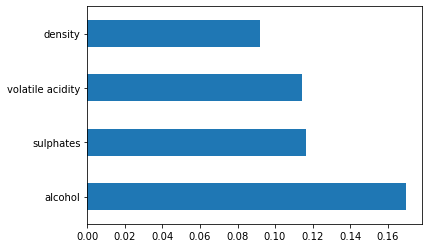

In [92]:
model = RandomForestClassifier()
model.fit(X, y)
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh'))

# Analysis
## Feature Importance:

1. We ran the feature analysis, where the column "alcohol" is the most crucial feature in this case to determine the y.


2. Classification Algorithms work much better in terms of performance


3. The regression analysis with numerical wine performes less optimal in this case


4. The reason behind it is that the with classification algorithms, there's higher accuracy with the limitation of the data size, and it doesn't gets limited by the data type. In this case, the wine score isn't really linear and the numerical result doesn't provide a good base for us to use regression or other similar methods to train the data. 

## Conclusion:
1. The best performing method is gradient boosting plus bagging, this provides a very high testing score of up to 0.92


2. The numerical analysis didn't provide much of a good score, the highest testing score is around 0.6 to 0.7


3. Classification algorithms performs best in this circumstances